# Machine Learning and Statistics Project

### **Neil Anglim**
***

## Task 1

### Square Root using Newtons method
>Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math.` In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.

>Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.

In [1]:
def sqrt(x) :
    # initial guess
    z = x / 4

    while(((z**0.5) - x) != 0): #while the square root is not = the expected value
        #loop until it is accurate
        for i in range(100):
            z1 = z - (((z * z) - x) / (2 * z))#newtons method
        else: break


    return z1


##### in the above code, one must input the correct answer in line 3 to get the accurate answer

In [2]:
sqrt(16)

4.0

> is there some other way in which I can work this...?

In [3]:
#test function on other numbers
sqrt(36)

6.5

In [4]:
36**0.5

6.0

## Task 2

### sci py
> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


To do this, I will need to develop the survey using *pandas*

In [5]:
import pandas as pd

# Create a sample survey dataset with quantities
data = {
    'Drink': ['Coffee', 'Coffee','Tea', 'Tea'],
    'Biscuits': ['Chocolate', 'Plain', 'Chocolate', 'Plain'],
    'Quantity': [43, 57, 56, 45]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Create a contingency table using crosstab with quantities
contingency_table = pd.crosstab(df['Drink'], df['Biscuits'], values=df['Quantity'], aggfunc='sum', rownames=['Drink'], colnames=['Biscuits'])


contingency_table

Biscuits,Chocolate,Plain
Drink,,
Coffee,43,57
Tea,56,45


Now to attempt to see is there any evidence of association between the preferences

In [6]:
from scipy.stats import chi2_contingency


# Perform the chi squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

The above function, chi2_contingency, returns four values; the chi-squared statistic(chi2), the p-value(p), the degrees of freedom, and the expected frequencies. As I have no desire to view the last two variables, I use the "_" to throw away the unwanted values. I learned about these other values from the documentation cited below.

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency


In [7]:
print(f"The chi-squared statistic is {chi2} and the p-value is {p}")

The chi-squared statistic is 2.6359100836554257 and the p-value is 0.10447218120907394


From the above p-value, which is significantly larger than the commonly chosen significance level of 0.05, we do not have strong statistical evidence to reject the null hypothesis, and as such  we can ascertain that there may not be a significant association between drink preference and biscuit preference with the values given in this case.

## Task 3

### t-testing
> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in body mass of male and female gentoo penguins.

First, I am going to load in the dataset and the necessary libraries

In [8]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

penguins = sns.load_dataset('penguins')

Now I am going to check that the dataset is loaded correctly

In [9]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


Seperate the data into  the gentoo penguins, and the males and females groups

In [10]:
gentoo_penguins = penguins[penguins["species"] == "Gentoo"]

male_penguins = gentoo_penguins[gentoo_penguins["sex"] == "Male"]
female_penguins = gentoo_penguins[gentoo_penguins["sex"] == "Female"]

Now perform a t-test, display the results and determine the significance

In [11]:
t_statistic, p_value = stats.ttest_ind(male_penguins["body_mass_g"], female_penguins["body_mass_g"])

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05 # Set your significance level
if p_value < alpha:
    print("There is significant evidence of a difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant evidence of a difference in body mass between male and female Gentoo penguins.")

T-Statistic: 14.721676481405709
P-Value: 2.133687602018886e-28
There is significant evidence of a difference in body mass between male and female Gentoo penguins.


We can see from this that there is evidence of sexual dimorphism in Gentoo penguins, as seen in the above t-test and also below in the violin plot; the heaviest of the female penguins only fall around the average weights of the male penguins.

Text(0, 0.5, 'Body Mass (g)')

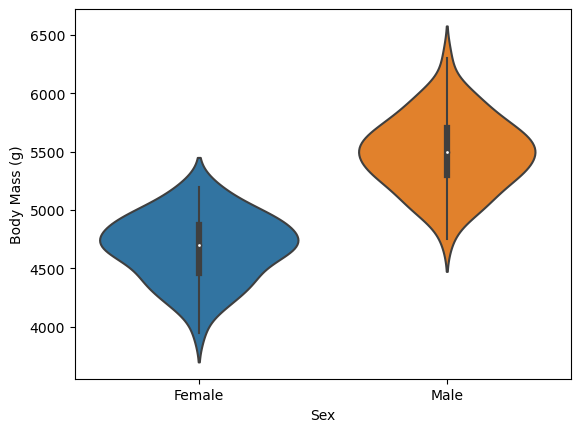

In [12]:
sns.violinplot(x="sex", y="body_mass_g", data=gentoo_penguins)
plt.xlabel("Sex")
plt.ylabel("Body Mass (g)")

## Task 4

### iris

## Task 5

### 

*** 
# End